## Proxy metrics for

Conformity Factor $\Lambda$

The conformity factor $\Lambda$, is defined as $\Lambda$ = median[$\cos(\delta)$], where $\delta$ is the angle between the river drainage direction and the downslope direction of the topographic expansion (Black et al., 2017).

Here we define CF as $\Lambda$ = $\cos(\delta)$


## Reference

Black, B. A., Perron, J. T., Hemingway, D., Bailey, E., Nimmo, F., & Zebker, H. (2017). Global drainage patterns and the origins of topographic relief on Earth, Mars, and Titan. Science, 356(6339), 727-731. [[Link]](https://science.sciencemag.org/content/356/6339/727.abstract)

In [1]:
import numpy as np
import os 
import pyshtools as pysh

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from qixiang import functions as fnqx

In [2]:
# dir_db   = '../Data/earth2014/data_1min/topo_grids'
# fname_db = 'Earth2014.TBI2014.1min.geod.bin' 
# fname_save  = 'Earth2014.TBI2014.1min' 
# order_db = 10800
# res_deg = 1/60

dir_db   = '../Data/earth2014/data_5min/topo_grids'
fname_db = 'Earth2014.TBI2014.5min.geod.bin' 
fname_save  = 'Earth2014.TBI2014.5min' 
order_db = 2160
res_deg = 5/60

fname_topo = os.path.join(dir_db,fname_db)

In [3]:
# This scirpt shows how to access the data grids of earth2014 model
# Source code: access_Earth2014_grids5min.m (Christian Hirt, Moritz Rexer)

# grid definitions
lats = np.arange((-90+res_deg/2),(90-res_deg/4),res_deg)
lons = np.arange((-180+res_deg/2),(180-res_deg/4),res_deg)
nlat = len(lats) 
nlon = len(lons)

extent_earth2014 = (lons.min(),lons.max(),lats.min(),lats.max())
#extent_earth2014 = [minlon1,maxlon1,minlat1,maxlat1]

# read data
data_topo = np.fromfile(fname_topo, dtype='>i2').reshape((nlat, nlon))
data_topo = data_topo.astype(np.int16) # data = data.astype('<i2')
data_topo = np.flipud(data_topo)

# get SHCs
topo = pysh.SHGrid.from_array(data_topo)
coeffs = pysh.expand.SHExpandDH(topo.data, sampling=2)

In [4]:
# grid definitions of region
#name_area ='Tibet'
#minlon2,maxlon2,minlat2,maxlat2 = (65,110,15,45) # Tibet

name_area ='TRR'
extent_trr  = (88,108,20,36)

# name_area = 'TRR2'
# minlon2,maxlon2,minlat2,maxlat2 = (91, 106,21,35)

extent_area = extent_trr
order_t = order_db
extent_area_r,data_area = fnqx.get_data(data_topo,extent_area,res_deg)

lons_area = np.arange(extent_area_r[0],extent_area_r[1]+res_deg/2,res_deg)
lats_area = np.arange(extent_area_r[2],extent_area_r[3]+res_deg/2,res_deg)
Lons_area,Lats_area = np.meshgrid(lons_area,lats_area)

In [5]:
#res_t = res_t_range[i]
res_t = 20
lmax = int(res_t+1)
    
coeffs_f = coeffs.copy()
coeffs_f[:, lmax:, :] = 0.
topo_f = pysh.expand.MakeGridDH(coeffs_f, sampling=2)

extent_area_r,data_areaf = fnqx.get_data(topo_f,extent_area,res_deg)

## 1.1 Select a segment of river for test

In [6]:
labels= ['Yangtz','Mekong','Salween']
labels2= ['Yz','Mk','Sw']
colors =['b','r','c']

xticks_area = np.arange(-180,180+2,2)
yticks_area = np.arange(-90,90+2,2)
xticks_rect = np.arange(-180,180+0.05,0.05)
yticks_rect = np.arange(-90,90+0.05,0.05)

In [7]:
index_N = 20 
index_seg = np.arange(0,index_N)

fname_load = 'data_rivers/River'+labels2[0]+'.txt'
river_xyo = np.loadtxt(fname_load)
river_xy_seg = river_xyo[index_seg,0:2]

rect_extend = res_deg*2
extent_seg = (river_xy_seg[:,0].min(),river_xy_seg[:,0].max(),
              river_xy_seg[:,1].min(),river_xy_seg[:,1].max())
extent_rect = (extent_seg[0]-rect_extend,extent_seg[1]+rect_extend,
               extent_seg[2]-rect_extend,extent_seg[3]+rect_extend)

extent_rect_r,data_rect = fnqx.get_data(data_topo,extent_rect,res_deg)
extent_rect_r,data_rectf = fnqx.get_data(topo_f,extent_rect,res_deg)

lons_rect = np.arange(extent_rect_r[0],extent_rect_r[1]+res_deg/2,res_deg)
lats_rect = np.arange(extent_rect_r[2],extent_rect_r[3]+res_deg/2,res_deg)
Lons_rect,Lats_rect = np.meshgrid(lons_rect,lats_rect)

rect_x = extent_rect_r[0]
rect_y = extent_rect_r[2]
rect_w = extent_rect_r[1]- extent_rect_r[0]
rect_h = extent_rect_r[3]- extent_rect_r[2]

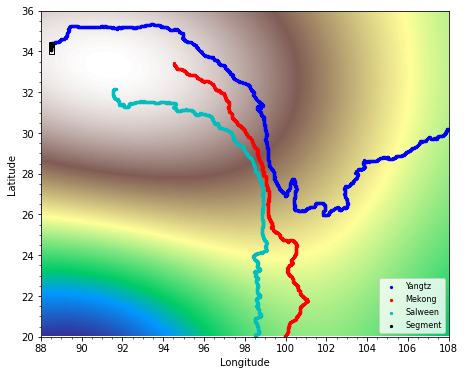

In [8]:
# plot parameters
extent_img = extent_area_r
extent_fig = extent_area
#data_img = data_area.copy()
data_img = data_areaf.copy()
cmap = cm.terrain 

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=yticks_area, xticks=xticks_area)
ax.minorticks_on()
#fname_fig=
#ax.set_title(fname_fig)
ax.axis(extent_fig)
ax.imshow(data_img, extent=extent_img,cmap=cmap)
for i in range(0,len(labels)):
    fname_load = "data_rivers/River"+labels2[i]+'.txt'
    river_xyo = np.loadtxt(fname_load)
    ax.scatter(river_xyo[:,0],river_xyo[:,1],label=labels[i],color=colors[i],s =5)
ax.scatter(river_xy_seg[:,0],river_xy_seg[:,1],label='Segment',color='k',s =5)
ax.add_patch(plt.Rectangle((rect_x,rect_y),rect_w,rect_h,fill=False,edgecolor='k',linewidth=1))
plt.legend(loc = 'lower right',prop = {'size':8}) 

# if save_mode == True:
#     plt.savefig((fname_fig+'.png'),dpi=dpi)

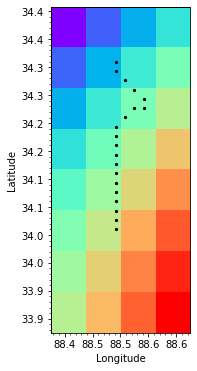

In [9]:
# plot parameters
extent_img = extent_rect_r 
#data_img = data_rect.copy()
data_img = data_rectf.copy()
cmap = cm.rainbow

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=yticks_rect, xticks=xticks_rect)
ax.minorticks_on()
ax.imshow(data_img, extent=extent_img,cmap=cmap )
ax.scatter(river_xy_seg[:,0],river_xy_seg[:,1],label='Segment',color='k',s =5)
ax.add_patch(plt.Rectangle((rect_x,rect_y),rect_w,rect_h,fill=False,edgecolor='k',linewidth=1))
# if save_mode == True:
#     plt.savefig((fname_fig+'.png'),dpi=dpi)

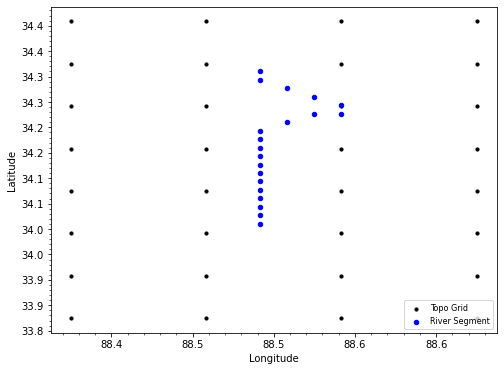

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=yticks_rect, xticks=xticks_rect)
ax.minorticks_on()
ax.scatter(Lons_rect,Lats_rect,label='Topo Grid',color='k',s=10)
ax.scatter(river_xy_seg[:,0],river_xy_seg[:,1],label='River Segment',color='b',s =20)
plt.legend(loc = 'lower right',prop = {'size':8}) 
# if save_mode == True:
#     plt.savefig((fname_fig+'.png'),dpi=dpi)

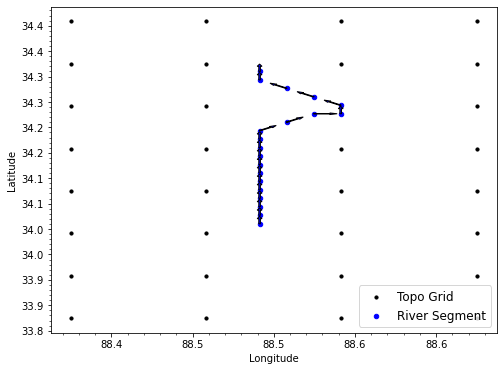

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=yticks_rect, xticks=xticks_rect)
ax.minorticks_on()
#fname_fig=
#ax.set_title(fname_fig)
#ax.axis(extent_fig)
ax.scatter(Lons_rect,Lats_rect,label='Topo Grid',color='k',s=10)
ax.scatter(river_xy_seg[:,0],river_xy_seg[:,1],label='River Segment',color='b',s =20)
plt.legend(loc = 'lower right',prop = {'size':12}) 

azi_river=fnqx.cal_azi_river(river_xy_seg)
arrow_sc = 0.01
arrow_xs = np.sin(np.radians(azi_river))
arrow_ys = np.cos(np.radians(azi_river))
for i_arrow in range(0,len(azi_river)):
    arrow_x = arrow_xs[i_arrow]
    arrow_y = arrow_ys[i_arrow] 
#     arrow_n = np.sqrt(arrow_x**2+arrow_y**2)
    arrow_x = arrow_x*arrow_sc
    arrow_y = arrow_y*arrow_sc
    ax.arrow(river_xy_seg[i_arrow,0],river_xy_seg[i_arrow,1],arrow_x,arrow_y,fc='b')
# if save_mode == True:
#     plt.savefig((fname_fig+'.png'),dpi=dpi)

In [12]:
def find_closest(xy_t,x_s,y_s):
    x = xy_t[:,0]
    y = xy_t[:,1]
    N = len(x)
    xy_s = xy_t.copy()
    xy_sindex = xy_t.copy()
    for i in range(0,N):
        idx = (np.abs(x[i]-x_s)).argmin()
        xy_s[i,0]=x_s[idx]
        xy_sindex[i,0]=idx
    for i in range(0,N):
        idy = (np.abs(y[i]-y_s)).argmin()
        xy_s[i,1]=y_s[idy]
        xy_sindex[i,1]=idy
    _,idxy = np.unique(xy_s,axis=0,return_index=True)
    xy_s2 = xy_s[np.sort(idxy)]
    xy_sindex2 = xy_sindex[np.sort(idxy)].astype(int)
    return xy_s2 ,xy_sindex2

In [13]:
river_xy_mesh,river_xy_meshindex= find_closest(river_xy_seg,lons_rect,lats_rect)
azi_river_mesh = fnqx.cal_azi_river(river_xy_mesh)

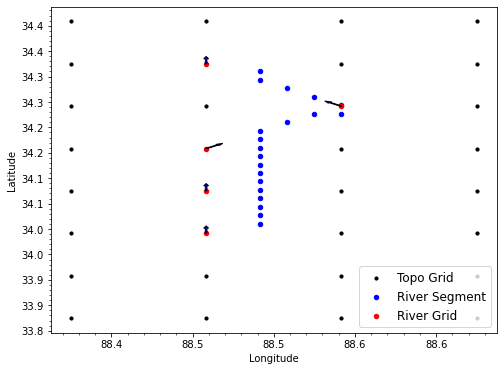

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=yticks_rect, xticks=xticks_rect)
ax.minorticks_on()
#fname_fig=
#ax.set_title(fname_fig)
#ax.axis(extent_fig)
ax.scatter(Lons_rect,Lats_rect,label='Topo Grid',color='k',s=10)
ax.scatter(river_xy_seg[:,0],river_xy_seg[:,1],label='River Segment',color='b',s =20)
ax.scatter(river_xy_mesh[:,0],river_xy_mesh[:,1],label='River Grid',color='r',s =20)
plt.legend(loc = 'lower right',prop = {'size':12}) 

arrow_sc = 0.01
arrow_xs = np.sin(np.radians(azi_river_mesh))
arrow_ys = np.cos(np.radians(azi_river_mesh))
for i_arrow in range(0,len(azi_river_mesh)):
    arrow_x = arrow_xs[i_arrow]
    arrow_y = arrow_ys[i_arrow] 
#     arrow_n = np.sqrt(arrow_x**2+arrow_y**2)
    arrow_x = arrow_x*arrow_sc
    arrow_y = arrow_y*arrow_sc
    ax.arrow(river_xy_mesh[i_arrow,0],river_xy_mesh[i_arrow,1],arrow_x,arrow_y,fc='b')
# if save_mode == True:
#     plt.savefig((fname_fig+'.png'),dpi=dpi)

## 2.2 Calculate the azimuth of  topo

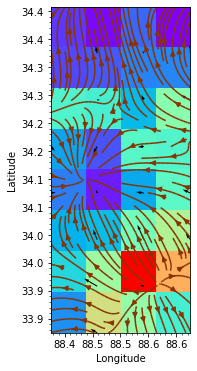

In [15]:
# plot parameters
extent_img = extent_rect_r 
extent_fig = extent_rect
#data_img = data_rectf.copy()
data_img = data_rect.copy()
cmap = cm.rainbow

UY,UX= np.gradient(-np.flipud(data_img.copy()))

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=yticks_rect, xticks=xticks_rect)
ax.minorticks_on()
#fname_fig=
#ax.set_title(fname_fig)
#ax.axis(extent_fig)
ax.imshow(data_img, extent=extent_img,cmap=cmap )

ax.quiver(Lons_rect, Lats_rect,UX,UY) #,width=arrow_width,scale=arrow_scale) #,width=0.0005,
ax.streamplot(Lons_rect, Lats_rect, UX, UY, density=1.0, color='#883300',zorder = 2)
    
#ax.scatter(river_xy_seg[:,0],river_xy_seg[:,1],label='Segment',color='k',s =5)
#ax.add_patch(plt.Rectangle((rect_x,rect_y),rect_w,rect_h,fill=False,edgecolor='k',linewidth=1))
# if save_mode == True:
#     plt.savefig((fname_fig+'.png'),dpi=dpi)

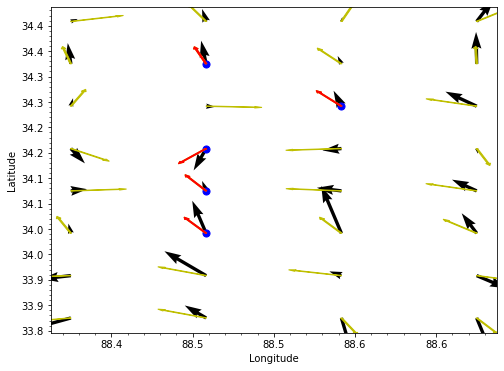

In [16]:
# plot parameters
extent_img = extent_rect_r 
extent_fig = extent_rect
#data_img = data_rectf.copy()
data_img = data_rect.copy()
cmap = cm.rainbow

UY,UX = np.gradient(-np.flipud(data_img.copy()))
#UX,UY = np.gradient(-data_img.copy())
UYY = np.flipud(UY)
UXX = np.flipud(UX)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=yticks_rect, xticks=xticks_rect)
ax.minorticks_on()
#fname_fig=
#ax.set_title(fname_fig)
#ax.axis(extent_fig)
#ax.imshow(data_img, extent=extent_img,cmap=cmap )

ax.quiver(Lons_rect, Lats_rect,UX,UY) #,width=arrow_width,scale=arrow_scale) #,width=0.0005,
#ax.streamplot(Lons_rect, Lats_rect, UX, UY, density=1.0, color='#883300',zorder = 2)

#ax.scatter(Lons_rect,Lats_rect,label='Topo Grid',color='k',s=10)
ax.scatter(river_xy_mesh[:,0],river_xy_mesh[:,1],label='River Grid',color='b',s =50)

# ax.quiver(Lons_rect, Lats_rect,UX,UY) #,width=arrow_width,scale=arrow_scale) #,width=0.0005,
# ax.streamplot(Lons_rect, Lats_rect, UX, UY, density=1.0, color='#883300',zorder = 2)
 
azi_topo2 = UX.copy()
for i in range(0,UX.shape[0]):
    for j in range(0,UX.shape[1]):
        x = UX[i,j]
        y = UY[i,j]
        #azi_topo[i] =  math.atan(x/y)
        azi_topo2[i,j] = fnqx.cal_azi(0,0,x,y)  
#azi_topo2 = np.flipud(azi_topo2)
    
arrow_sc = 0.03
arrow_xs = np.sin(np.radians(azi_topo2))
arrow_ys = np.cos(np.radians(azi_topo2))
for i in range(0,UX.shape[0]):
    for j in range(0,UX.shape[1]):
        arrow_x = arrow_xs[i,j]
        arrow_y = arrow_ys[i,j]
        arrow_x = arrow_x*arrow_sc
        arrow_y = arrow_y*arrow_sc
        ax.arrow(Lons_rect[i,j],Lats_rect[i,j],arrow_x,arrow_y,color='y')    
        
azi_topo = azi_river_mesh.copy()
river_yx_meshindex = np.fliplr(river_xy_meshindex.copy())
for i in range(0,len(azi_river_mesh)):
    idyx = tuple(river_yx_meshindex[i])
    x = UX[idyx]
    y = UY[idyx]
    #azi_topo[i] =  math.atan(x/y)
    azi_topo[i] = fnqx.cal_azi(0,0,x,y)

arrow_sc = 0.03
arrow_xs = np.sin(np.radians(azi_topo))
arrow_ys = np.cos(np.radians(azi_topo))
for i_arrow in range(0,len(azi_topo)):
    arrow_x = arrow_xs[i_arrow]
    arrow_y = arrow_ys[i_arrow] 
#     arrow_n = np.sqrt(arrow_x**2+arrow_y**2)
    arrow_x = arrow_x*arrow_sc
    arrow_y = arrow_y*arrow_sc
    ax.arrow(river_xy_mesh[i_arrow,0],river_xy_mesh[i_arrow,1],arrow_x,arrow_y,color='r')
#ax.arrow(Lons_rect[-1,-1],Lats_rect[-1,-1],np.sin(np.radians(324))*arrow_sc,np.cos(np.radians(324))*arrow_sc,color='r') 
# if save_mode == True:
#     plt.savefig((fname_fig+'.png'),dpi=dpi)